In [1]:
import sys
from pathlib import Path

root_dir = Path.cwd().parent 
sys.path.append(str(root_dir))


In [2]:
from clustering.time_series_clusterer import TimeSeriesClusterer
import numpy as np

In [3]:
# RANDOM_SEED = 42

In [4]:
# # Generate sample data
# n_series = 50
# series_length = 100

# X = np.zeros((n_series, 1, series_length))
# series_ids = [f"TS_{i}" for i in range(n_series)]

# for i in range(n_series):
#     t = np.linspace(0, 10, series_length)
#     pattern = i % 3
    
#     if pattern == 0:
#         X[i, 0, :] = np.sin(t) + np.random.normal(0, 0.1, series_length)
#     elif pattern == 1:
#         X[i, 0, :] = 0.5 * t + np.random.normal(0, 0.1, series_length)
#     else:
#         X[i, 0, :] = np.cumsum(np.random.normal(0, 0.1, series_length))

# # Create and fit clusterer
# clusterer = TimeSeriesClusterer(n_clusters=3)
# clusterer.fit(X, series_ids)

# # Example of getting label for a specific series
# print(f"Cluster for TS_0: {clusterer.get_label_from_id('TS_0')}")
# print(f"Cluster for TS_1: {clusterer.get_label_from_id('TS_1')}")

# # Plot clusters
# clusterer.plot_clusters()


# How to preprocess the CAMELS-CH dataset

In [5]:
from pathlib import Path
import pandas as pd

# Directory to access files
directory = Path("/Users/cooper/Desktop/CAMELS-CH/data/timeseries/observation_based")


def extract_median_weekly_streamflow(file: Path) -> pd.Series:
    """
    Extracts a one-year time series where each value is the median
    for that day over all years.
    Args:
        file (Path): Path to the CSV file.
    Returns:
        pd.Series: Median daily streamflow values for each day of the year.
    """
    data = pd.read_csv(file, index_col=0, parse_dates=True)

    if "discharge_spec(mm/d)" not in data.columns:
        raise ValueError(f"Column 'discharge_spec(mm/d)' not found in {file}")

    streamflow = data["discharge_spec(mm/d)"]

    return (
        streamflow.resample("W").median().groupby(lambda x: x.isocalendar()[1]).median()
    )

    return streamflow.groupby(streamflow.index.dayofyear).median()


# Initialize lists to store gauge IDs and one-year time series
gauge_ids = []
median_time_series = []

# Process each file in the directory
for file in directory.glob("*.csv"):
    if file.is_file():
        # Extract the gauge ID from the file name
        gauge_id = file.stem.split("_")[-1]
        gauge_ids.append(gauge_id)

        # Extract and store the median daily streamflow for one year
        try:
            one_year_median = extract_median_weekly_streamflow(file)
            median_time_series.append(one_year_median)
        except Exception as e:
            print(f"Error processing {file}: {e}")

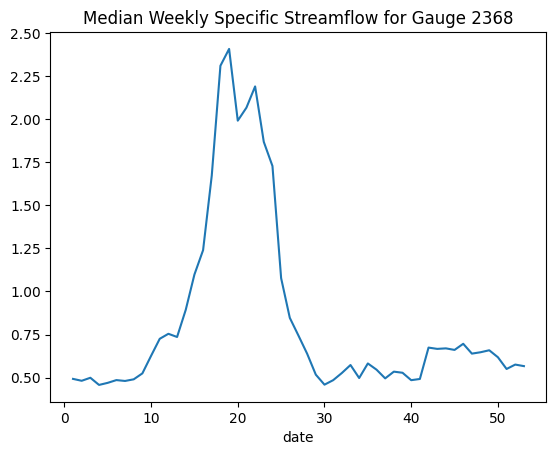

In [6]:
# Find index of 2623 
index = gauge_ids.index("2368")

# Plot the first median time series
if median_time_series:
    median_time_series[index].plot(title=f"Median Weekly Specific Streamflow for Gauge {gauge_ids[index]}")


In [7]:
# X = np.zeros((len(median_time_series), 1, 53))
# for i, series in enumerate(median_time_series):
#     X[i, 0, :] = series.values  # Drop the time column, keep only values

# mask_valid = ~np.isnan(X).any(axis=(1, 2))
# X = X[mask_valid]
# gauge_ids = [gid for i, gid in enumerate(gauge_ids) if mask_valid[i]]

# X_scaled = (X - X.mean(axis=2, keepdims=True)) / X.std(axis=2, keepdims=True)

# clusterer = TimeSeriesClusterer(n_clusters=3)

# clusterer.fit(X_scaled, gauge_ids)

# clusterer.plot_clusters()

In [8]:
# clusterer.get_label_from_id("2091")

In [9]:
# import geopandas as gpd

In [10]:
# file_path = "/Users/cooper/Desktop/CAMELS-CH/data/catchment_delineations/CAMELS_CH_sub_catchments.shp"

# gdf = gpd.read_file(file_path)

# # Convert gauge_ids in gdf to strings
# gdf["gauge_id"] = gdf["gauge_id"].astype(int).astype(str)

# # Filter and add clusters
# gdf = gdf[gdf["gauge_id"].isin(gauge_ids)]
# gdf["cluster"] = [clusterer.get_label_from_id(gid) for gid in gdf["gauge_id"]]

# gdf.plot(column="cluster", legend=True, categorical=True, figsize=(10, 10))

# # gdf.to_file("/Users/cooper/Desktop/CAMELS-CH/data/catchment_delineations/CAMELS_CH_sub_catchments_clustered.shp")